In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import json
import glob
import numpy as np
import cv2
import copy

video_files =  glob.glob('/content/drive/Shareddrives/deepfakedetect/deepfakedetect/dfd50_testdatset/*.mp4')
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 301, 300, 300, 300, 300, 301]
Total number of videos:  119
Average frame per video: 300.01680672268907


In [3]:
# to extract frame
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image
!pip3 install face_recognition
!mkdir '/content/drive/Shareddrives/deepfakedetect/deepfakedetect/dfd50_testdatset_processed'
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.autonotebook import tqdm
# process the frames
def create_face_videos(path_list,out_dir):
  already_present_count =  glob.glob(out_dir+'*.mp4')
  print("No of videos already present " , len(already_present_count))
  for path in tqdm(path_list):
    out_path = os.path.join(out_dir,path.split('/')[-1])
    file_exists = glob.glob(out_path)
    if(len(file_exists) != 0):
      print("File Already exists: " , out_path)
      continue
    frames = []
    flag = 0
    face_all = []
    frames1 = []
    out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
    for idx,frame in enumerate(frame_extract(path)):
      #if(idx % 3 == 0):
      if(idx <= 150):
        frames.append(frame)
        if(len(frames) == 4):
          faces = face_recognition.batch_face_locations(frames)
          for i,face in enumerate(faces):
            if(len(face) != 0):
              top,right,bottom,left = face[0]
            try:
              out.write(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
            except:
              pass
          frames = []
    try:
      del top,right,bottom,left
    except:
      pass
    out.release()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=176e2ca8e2a9747d308d0f3df82ed817346aa50836895a348672d8d48a9843e5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
mkdir: cannot create directory ‘/content/drive/Shareddrives/deepfakedetect/deepfakedetect/dfd50_testdatset_processed’: File exists


<ipython-input-3-0a8713f31a72>:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
create_face_videos(video_files,'/content/drive/Shareddrives/deepfakedetect/deepfakedetect/dfd50_testdatset_processed')

No of videos already present  0


  0%|          | 0/119 [00:00<?, ?it/s]

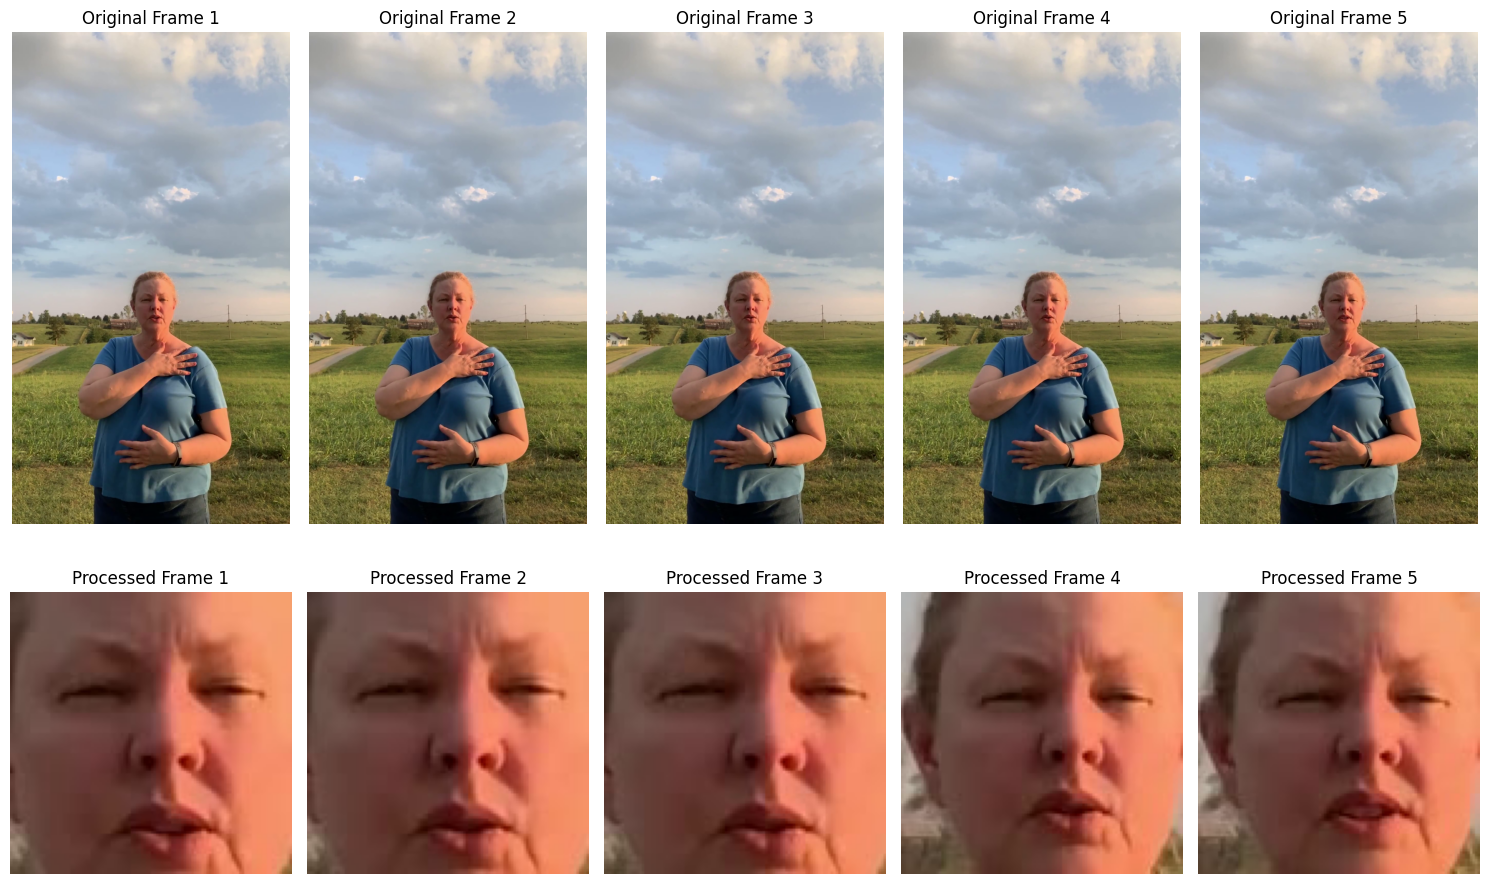

In [5]:
import matplotlib.pyplot as plt

# Function to extract and return the first few frames from a video
def extract_sample_frames(video_path, num_frames=5):
    cap = cv2.VideoCapture(video_path)
    frames = []
    count = 0
    while count < num_frames:
        success, frame = cap.read()
        if not success:
            break
        frames.append(frame)
        count += 1
    cap.release()
    return frames

# Path to an example video before and after preprocessing
original_video_path = video_files[0]  # Pick the first video from the original list
processed_video_path = os.path.join('/content/drive/Shareddrives/deepfakedetect/deepfakedetect/dfd50_testdatset_processed', os.path.basename(original_video_path))

# Extract sample frames
original_frames = extract_sample_frames(original_video_path, num_frames=5)
processed_frames = extract_sample_frames(processed_video_path, num_frames=5)

# Plotting the frames side-by-side
plt.figure(figsize=(15, 10))
for i in range(5):
    # Original video frames
    plt.subplot(2, 5, i + 1)
    if i < len(original_frames):
        plt.imshow(cv2.cvtColor(original_frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Original Frame {i+1}")
    plt.axis('off')

    # Processed video frames
    plt.subplot(2, 5, i + 6)
    if i < len(processed_frames):
        plt.imshow(cv2.cvtColor(processed_frames[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Processed Frame {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
